In [381]:
from gymnasium.envs.registration import register
import gymnasium as gym
from q_learn_code.agent.Agent import Agent
import numpy as np
import pandas as pd
from collections import defaultdict
from tqdm import tqdm
import pickle as pk
from collections import defaultdict
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
city = 'Perth'

In [3]:
register(
     id="MARCPTR",
     entry_point="q_learn_code.envs:MARCPTR",
     max_episode_steps=300,
)

In [4]:
env = gym.make('q_learn_code.envs:MARCPTR')

In [ ]:
#env.define_user('89288865@N00', city)

In [5]:
env.reset()
env.render()
#env.set_size(25)

In [6]:
data = pd.read_csv("data_process/_RawData/" + city + "/touristsVisits.csv")
startpoint = {}
for item in list(data['userID']):
    start = np.random.randint(25)
    end = start
    while (start == end):
        end = np.random.randint(25)
    startpoint[item] = (start, end)

In [7]:
file = open('data_process/' + city + '/sequence', 'rb')
sequence = pk.load(file)

startpoint = {}
for item in sequence:
    start = sequence[item][0]
    end = sequence[item][-1]
    startpoint[item] = (start, end)
    
#startpoint

In [8]:
startpoint

{'11146442@N00': (1, 23),
 '11587194@N06': (18, 1),
 '11845746@N00': (13, 13),
 '12199582@N00': (12, 12),
 '12288823@N07': (20, 20),
 '15213592@N03': (1, 19),
 '16105263@N00': (15, 15),
 '17295541@N02': (20, 20),
 '17611055@N00': (3, 3),
 '19229064@N00': (22, 6),
 '19604783@N00': (6, 6),
 '20385902@N03': (1, 1),
 '20692723@N07': (6, 6),
 '20724439@N00': (19, 19),
 '21156246@N00': (22, 6),
 '21717623@N04': (9, 1),
 '22563879@N04': (17, 17),
 '22872308@N00': (22, 22),
 '22997058@N02': (14, 14),
 '23698286@N00': (6, 1),
 '23809369@N08': (12, 17),
 '24363024@N06': (7, 7),
 '24395823@N03': (6, 7),
 '24576031@N04': (13, 13),
 '24918835@N03': (6, 17),
 '25046991@N00': (6, 19),
 '25208029@N00': (17, 17),
 '25448337@N07': (1, 6),
 '25654955@N03': (9, 9),
 '26036678@N07': (17, 17),
 '26223114@N02': (15, 15),
 '26303188@N00': (3, 3),
 '26678013@N00': (13, 13),
 '26757052@N04': (1, 3),
 '28637259@N03': (20, 1),
 '28745244@N00': (4, 4),
 '28787859@N05': (6, 17),
 '28836100@N00': (6, 22),
 '29007050

In [311]:
def train_model(agent, n_episodes):
    #env = gym.wrappers.RecordEpisodeStatistics(env, deque_size=n_episodes)
    total_rw = []
    for episode in tqdm(range(n_episodes)):
        obs, info = env.reset()
        done = False

        # play one episode
        rw = 0
        while not done:
            action = agent.get_action(obs['agent'], env)

            next_obs, reward, terminated, truncated, info = env.step(action)
            
            rw = rw + reward

            # update the agent
            agent.update(obs['agent'], action, reward, terminated, next_obs['agent'])

            # update if the environment is done and the current obs
            done = terminated or truncated

            obs = next_obs
        total_rw.append(rw)
        #print(rw)
        #print(reward)

        agent.decay_epsilon()
    return total_rw

In [312]:
# hyperparameters
learning_rate = 0.01
n_episodes = 200
start_epsilon = 1.0
epsilon_decay = start_epsilon / (n_episodes / 2)  # reduce the exploration over time
final_epsilon = 0.1
#################


In [313]:
Q_TABLES = {}
for item in startpoint:
    agent = Agent(learning_rate=learning_rate,initial_epsilon=start_epsilon,
              epsilon_decay=epsilon_decay,final_epsilon=final_epsilon, q_table_size=25)
    
    env.reset()
    env.define_user(item, city)
    train_model(agent, n_episodes)
    Q_TABLES[item] = agent.q_values
    

100%|█████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 571.44it/s]


In [ ]:
#Q_TABLES['89288865@N00']

In [ ]:
#agent.q_values
## delete enviroment
#gym.envs.registry
#del gym.envs.registry['MARCPTR']

In [140]:
startpoint

{'11146442@N00': (1, 23),
 '11587194@N06': (18, 1),
 '11845746@N00': (13, 13),
 '12199582@N00': (12, 12),
 '12288823@N07': (20, 20),
 '15213592@N03': (1, 19),
 '16105263@N00': (15, 15),
 '17295541@N02': (20, 20),
 '17611055@N00': (3, 3),
 '19229064@N00': (22, 6),
 '19604783@N00': (6, 6),
 '20385902@N03': (1, 1),
 '20692723@N07': (6, 6),
 '20724439@N00': (19, 19),
 '21156246@N00': (22, 6),
 '21717623@N04': (9, 1),
 '22563879@N04': (17, 17),
 '22872308@N00': (22, 22),
 '22997058@N02': (14, 14),
 '23698286@N00': (6, 1),
 '23809369@N08': (12, 17),
 '24363024@N06': (7, 7),
 '24395823@N03': (6, 7),
 '24576031@N04': (13, 13),
 '24918835@N03': (6, 17),
 '25046991@N00': (6, 19),
 '25208029@N00': (17, 17),
 '25448337@N07': (1, 6),
 '25654955@N03': (9, 9),
 '26036678@N07': (17, 17),
 '26223114@N02': (15, 15),
 '26303188@N00': (3, 3),
 '26678013@N00': (13, 13),
 '26757052@N04': (1, 3),
 '28637259@N03': (20, 1),
 '28745244@N00': (4, 4),
 '28787859@N05': (6, 17),
 '28836100@N00': (6, 22),
 '29007050

In [288]:
sequence

{'11146442@N00': [1, 7, 6, 23],
 '11587194@N06': [18, 6, 1],
 '11845746@N00': [13],
 '12199582@N00': [12],
 '12288823@N07': [20],
 '15213592@N03': [1, 22, 7, 18, 19],
 '16105263@N00': [15],
 '17295541@N02': [20],
 '17611055@N00': [3],
 '19229064@N00': [22, 6],
 '19604783@N00': [6],
 '20385902@N03': [1],
 '20692723@N07': [6],
 '20724439@N00': [19],
 '21156246@N00': [22, 6],
 '21717623@N04': [9, 17, 12, 1],
 '22563879@N04': [17],
 '22872308@N00': [22],
 '22997058@N02': [14],
 '23698286@N00': [6, 7, 1],
 '23809369@N08': [12, 17],
 '24363024@N06': [7],
 '24395823@N03': [6, 7],
 '24576031@N04': [13],
 '24918835@N03': [6, 17],
 '25046991@N00': [6, 19],
 '25208029@N00': [17],
 '25448337@N07': [1, 17, 12, 20, 6],
 '25654955@N03': [9],
 '26036678@N07': [17],
 '26223114@N02': [15],
 '26303188@N00': [3],
 '26678013@N00': [13],
 '26757052@N04': [1, 17, 7, 3],
 '28637259@N03': [20, 1],
 '28745244@N00': [4],
 '28787859@N05': [6, 7, 1, 17],
 '28836100@N00': [6, 22],
 '29007050@N00': [18],
 '29795849@

In [307]:
agent = Agent(learning_rate=learning_rate,initial_epsilon=start_epsilon,
              epsilon_decay=epsilon_decay,final_epsilon=final_epsilon, q_table_size=25)
obs, info = env.reset(start=19, end=12)
env.define_user('65072601@N00', city)

In [298]:
obs

{'agent': array([0, 5]), 'target': array([0, 0])}

In [308]:
reward = train_model(agent, n_episodes)

100%|█████████████████████████████████████████████████████████████████| 10000/10000 [00:17<00:00, 585.50it/s]


In [ ]:
a[-1]

In [ ]:
env.observation_space

In [ ]:
env.set_size(25)
env.get_size()

In [ ]:
np.clip(np.matrix([0,4]) + np.matrix([1,4]), 0, 2)

In [ ]:
np.matrix([0,2]) + np.matrix([1,0])

In [ ]:
abs(25-15)


In [ ]:
import pickle as pk
file = open('data_process/adjacency', 'rb')
d = pk.load(file)
d

In [ ]:
import pickle as pk
file = open('data_process/adjacency', 'rb')
data = pk.load(file)
data

In [ ]:
data['89288865@N00'][0,0]

In [ ]:
a[9500:10000]

In [382]:
def plot_convergence(reward):
    sns.set_theme(style="darkgrid")
    mpl.rcParams['figure.dpi']= 300

    fig, ax = plt.subplots()
    xpoints = np.array([i for i in range(1, 1001)])
    ypoints = np.array(reward)

    ax.set_title('Convergência do modelo em relação 1 agente')
    plt.xlabel("Recompensa por episodio")
    plt.ylabel("Episodio de treinamento")

    plt.plot(xpoints, ypoints)
    plt.show()

In [317]:
recomendation = {}

In [322]:
def get_shortest_path(q_values, start, end):
    if(start == end):
        return [start]
    next_obs, info = env.reset(start=start, end=end)
    #print(next_obs)
    done = False
    shortest_path = []
    shortest_path.append(start)
    while not done:
        action_index = np.argmax(q_values[next_obs['agent'][1]])
        #print('proximo POI', action_index)
        while(action_index in shortest_path):
            q_values[:, np.argmax(q_values[next_obs['agent'][1]])] = -1000
            action_index = np.argmax(q_values[next_obs['agent'][1]])
            #print('proximo POI - inside while', action_index)
        next_obs, reward, terminated, truncated, info = env.step(action_index)
        #print(next_obs, terminated)
        shortest_path.append(next_obs['agent'][1])
        done = terminated or truncated
    return shortest_path

In [354]:
#env.reset()
recomendation = {}
for item in startpoint:
    print(item)
    q_values = Q_TABLES[item].copy()
    env.reset(start=startpoint[item][0], end=startpoint[item][1])
    sp = get_shortest_path(q_values, startpoint[item][0], startpoint[item][1])
    recomendation[item] = (sequence[item], sp)

11146442@N00
11587194@N06
11845746@N00
12199582@N00
12288823@N07
15213592@N03
16105263@N00
17295541@N02
17611055@N00
19229064@N00
19604783@N00
20385902@N03
20692723@N07
20724439@N00
21156246@N00
21717623@N04
22563879@N04
22872308@N00
22997058@N02
23698286@N00
23809369@N08
24363024@N06
24395823@N03
24576031@N04
24918835@N03
25046991@N00
25208029@N00
25448337@N07
25654955@N03
26036678@N07
26223114@N02
26303188@N00
26678013@N00
26757052@N04
28637259@N03
28745244@N00
28787859@N05
28836100@N00
29007050@N00
29795849@N00
30034121@N04
30226355@N07
30659367@N00
30920192@N08
31880573@N02
32192893@N08
32636708@N00
33126267@N06
33198390@N06
33690003@N07
34087769@N06
35034356424@N01
35118454@N00
37202464@N04
39944549@N03
40204125@N08
41282011@N00
41398827@N08
41894175689@N01
42509295@N00
42586967@N06
42696941@N04
42708559@N00
43337469@N00
44124475706@N01
44124479801@N01
45033416@N00
45104424@N00
46669054@N00
46778425@N00
47147630@N00
47365129@N07
47511315@N05
48148162@N08
49192024@N08
49503207397@N

In [352]:
recomendation

{'11146442@N00': ([1, 7, 6, 23], [1, 13, 12, 20, 2, 16, 4, 18, 10, 22, 23]),
 '11587194@N06': ([18, 6, 1], [18, 13, 12, 24, 20, 2, 23, 4, 1]),
 '15213592@N03': ([1, 22, 7, 18, 19],
  [1, 13, 2, 20, 21, 16, 24, 12, 11, 23, 17, 10, 9, 0, 19]),
 '21717623@N04': ([9, 17, 12, 1],
  [9,
   10,
   7,
   24,
   12,
   20,
   21,
   13,
   16,
   19,
   2,
   23,
   18,
   15,
   0,
   3,
   22,
   4,
   5,
   14,
   8,
   17,
   1]),
 '23698286@N00': ([6, 7, 1], [6, 13, 21, 24, 12, 18, 2, 20, 4, 1]),
 '25448337@N07': ([1, 17, 12, 20, 6],
  [1, 13, 14, 2, 23, 3, 11, 21, 24, 17, 10, 6]),
 '26757052@N04': ([1, 17, 7, 3],
  [1, 13, 21, 2, 20, 24, 0, 10, 22, 19, 23, 18, 12, 4, 5, 16, 14, 9, 3]),
 '28787859@N05': ([6, 7, 1, 17],
  [6,
   13,
   2,
   21,
   23,
   11,
   15,
   24,
   12,
   0,
   16,
   10,
   4,
   5,
   19,
   20,
   22,
   14,
   8,
   3,
   1,
   17]),
 '30226355@N07': ([6, 17, 7],
  [6, 13, 21, 23, 11, 10, 4, 19, 15, 2, 0, 24, 3, 20, 14, 16, 9, 18, 7]),
 '30659367@N00': ([1, 1

In [357]:
delete_key = []
for item in recomendation:
    if(len(recomendation[item][0]) == 1):
        delete_key.append(item)
for item in delete_key:
    del recomendation[item]

In [358]:
len(recomendation)

49

In [391]:
Total_R = []
Total_P = []
Mean_R = 0
Mean_P = 0
for item in recomendation:
    recall = len(intersection(recomendation[item][0], recomendation[item][1]))/len(recomendation[item][0])
    precis = len(intersection(recomendation[item][0], recomendation[item][1]))/len(recomendation[item][1])
    Mean_P = Mean_P + precis
    Mean_R = Mean_R + recall
    Total_R.append(recall)
    Total_P.append(precis)

In [393]:
#Total_R
Mean_P/len(recomendation)

0.22464360715158058

In [363]:
Total_R/len(recomendation)

0.8774538386783285

In [361]:
def intersection(list_a, list_b):
    return [ e for e in list_a if e in list_b ]

In [327]:
intersection([1,2,3,4,5,6], [1,2,3])

[1, 2, 3]

In [255]:
q_values[:, -1] = -1000

In [364]:
recomendation

{'11146442@N00': ([1, 7, 6, 23], [1, 13, 12, 20, 2, 16, 4, 18, 10, 22, 23]),
 '11587194@N06': ([18, 6, 1], [18, 13, 12, 24, 20, 2, 23, 4, 1]),
 '15213592@N03': ([1, 22, 7, 18, 19],
  [1, 13, 2, 20, 21, 16, 24, 12, 11, 23, 17, 10, 9, 0, 19]),
 '19229064@N00': ([22, 6],
  [22, 21, 16, 13, 24, 12, 20, 10, 4, 18, 11, 23, 8, 15, 14, 7, 6]),
 '21156246@N00': ([22, 6],
  [22, 16, 21, 2, 13, 12, 24, 5, 10, 1, 23, 4, 18, 6]),
 '21717623@N04': ([9, 17, 12, 1],
  [9,
   10,
   7,
   24,
   12,
   20,
   21,
   13,
   16,
   19,
   2,
   23,
   18,
   15,
   0,
   3,
   22,
   4,
   5,
   14,
   8,
   17,
   1]),
 '23698286@N00': ([6, 7, 1], [6, 13, 21, 24, 12, 18, 2, 20, 4, 1]),
 '23809369@N08': ([12, 17],
  [12,
   15,
   21,
   13,
   22,
   23,
   8,
   16,
   24,
   3,
   11,
   20,
   10,
   7,
   2,
   19,
   0,
   14,
   5,
   4,
   1,
   9,
   17]),
 '24395823@N03': ([6, 7], [6, 2, 20, 10, 24, 12, 13, 22, 21, 16, 4, 18, 7]),
 '24918835@N03': ([6, 17],
  [6, 13, 12, 20, 1, 10, 4, 8, 21, 16

In [156]:
q_values = agent.q_values.copy()
obs, info = env.reset(start=11, end=16)
print(obs)

{'agent': array([ 0, 11]), 'target': array([ 0, 16])}


In [211]:
action_index = np.argmax(q_values[obs['agent'][1]])
print(action_index)

16


In [212]:
obs, reward, terminated, truncated, info = env.step(action_index)

In [213]:
obs

{'agent': array([ 0, 16]), 'target': array([ 0, 16])}

In [194]:
terminated

False

In [230]:
q_values = agent.q_values
q_values

array([[-5.73801846e-01, -1.49928773e+01, -1.50133148e+01,
        -1.51275227e+01, -1.11834356e+01, -2.15392180e+01,
        -1.54970001e+01, -1.70575410e+01, -1.82358825e+01,
        -1.43120249e+01, -1.55451501e+01, -5.55602508e+00,
        -2.12964426e+01, -1.67773695e+01, -1.35610381e+01,
        -1.28843307e+01, -1.23118304e+01, -1.17053502e+01,
        -2.41966164e+01, -1.49321298e+01, -1.35391081e+01,
        -1.66232956e+01, -1.31110412e+01, -3.82436418e+01,
        -1.29074736e+01],
       [-2.74524035e+00, -9.63168861e+02, -9.58893864e+02,
        -9.91085610e+02, -9.75704573e+02, -9.90000311e+02,
        -9.90086969e+02, -9.74243170e+02, -9.80202210e+02,
        -9.56844299e+02, -9.72549072e+02, -9.57901776e+02,
        -9.73613029e+02, -9.76831985e+02, -9.68045953e+02,
        -9.90129027e+02, -9.70644276e+02, -9.76459827e+02,
        -9.90433223e+02, -9.85204718e+02, -9.76524778e+02,
        -9.70777258e+02, -9.67965723e+02, -9.90129074e+02,
        -9.44857462e+02],
    

In [223]:
q_values = 15
q_values

15

In [207]:

q_values[:, np.argmax(q_values[obs['agent'][1]])] = -1000

In [165]:
action_index = np.argmax(agent.q_values[obs['agent'][1]])
action_index

20

In [70]:
q_values

array([[ 2.78391692e-02,  1.41101588e-02, -1.00000000e+03,
         8.54414408e-03, -1.00000000e+03, -4.27291561e-03,
         2.63768476e-03,  8.99721861e-03,  7.24084691e-03,
         5.34863223e-03,  4.36592827e-02, -2.12442624e-03,
        -3.57046871e-03,  1.25536589e+00,  2.14907966e-02,
         2.01118990e-02, -1.00000000e+03, -4.97358696e-03,
         2.42136843e-02,  2.91099864e-02,  1.10985336e-02,
        -1.00000000e+03,  2.47003952e-02,  3.64726335e-02,
         2.97636573e-02],
       [ 2.03676806e-02,  2.03362868e-02, -1.00000000e+03,
         2.53492598e-03, -1.00000000e+03,  2.03989771e-03,
         1.73178246e-02,  2.68475890e-03,  1.16798696e-02,
         3.96210670e-03,  2.44931328e-02,  2.19052366e-02,
         5.56634501e-03,  1.04575354e+00,  2.82510890e-03,
         1.10331597e-03, -1.00000000e+03,  7.42020423e-03,
         2.66034389e-03,  5.37585277e-03,  4.42524665e-03,
        -1.00000000e+03,  1.94709883e-02,  2.27932756e-02,
         7.84026229e-03],
    

In [ ]:
obs, info = env.reset()
print(obs)

In [ ]:
action_index = np.argmax(agent.q_values[obs['agent'][1]])
print(action_index)

In [ ]:
next_obs, reward, terminated, truncated, info = env.step(action_index)

In [ ]:
next_obs

In [ ]:
obs = next_obs
obs

In [ ]:
agent.q_values[0][0]

In [ ]:
np.max(np.argmax(agent.q_values[start]))

In [ ]:
def train_model(agent, n_episodes):
    #env = gym.wrappers.RecordEpisodeStatistics(env, deque_size=n_episodes)
    total_rw = []
    for episode in tqdm(range(n_episodes)):
        obs, info = env.reset()
        done = False

        # play one episode
        rw = 0
        while not done:
            action = agent.get_action(obs['agent'], env)

            next_obs, reward, terminated, truncated, info = env.step(action)
            
            rw = rw + reward

            # update the agent
            agent.update(obs['agent'], action, reward, terminated, next_obs['agent'])

            # update if the environment is done and the current obs
            done = terminated or truncated

            obs = next_obs
        total_rw.append(rw)
        #print(rw)
        #print(reward)

        agent.decay_epsilon()
    return total_rw

In [ ]:
obs, info = env.reset(start=0, end=22)

In [ ]:
obs

In [462]:
def plot_cdf_recall_precision(Total_R, Total_P, mean_R, mean_P):
    sns.set_theme(style="darkgrid")
    mpl.rcParams['figure.dpi']= 300

    plt.rcParams["figure.figsize"] = [8, 4]
    plt.rcParams["figure.autolayout"] = True

    data1 = Total_R
    data2 = Total_P
    
    count1, bins_count1 = np.histogram(data1, bins=100)
    pdf1 = count1 / sum(count1)
    cdf1 = np.cumsum(pdf1)
    plt.plot(bins_count1[1:], cdf1, label="CDF Recall", color='#009933')
    mean_R = [mean_R]*2
    plt.plot([0,1], mean_R, "--", label="Recall Mean", color='#ff0000', linewidth = '0.5')

    
    count2, bins_count2 = np.histogram(data2, bins=100)
    pdf2 = count2 / sum(count2)
    cdf2 = np.cumsum(pdf2)
    plt.plot(bins_count2[1:], cdf1, label="CDF Precision", color='#3333ff')
    mean_P = [mean_P]*2
    plt.plot([0,1], mean_P, "-.", label="Precision Mean", color='#ff0000', linewidth = '0.5')
    
    plt.legend()
    plt.show()

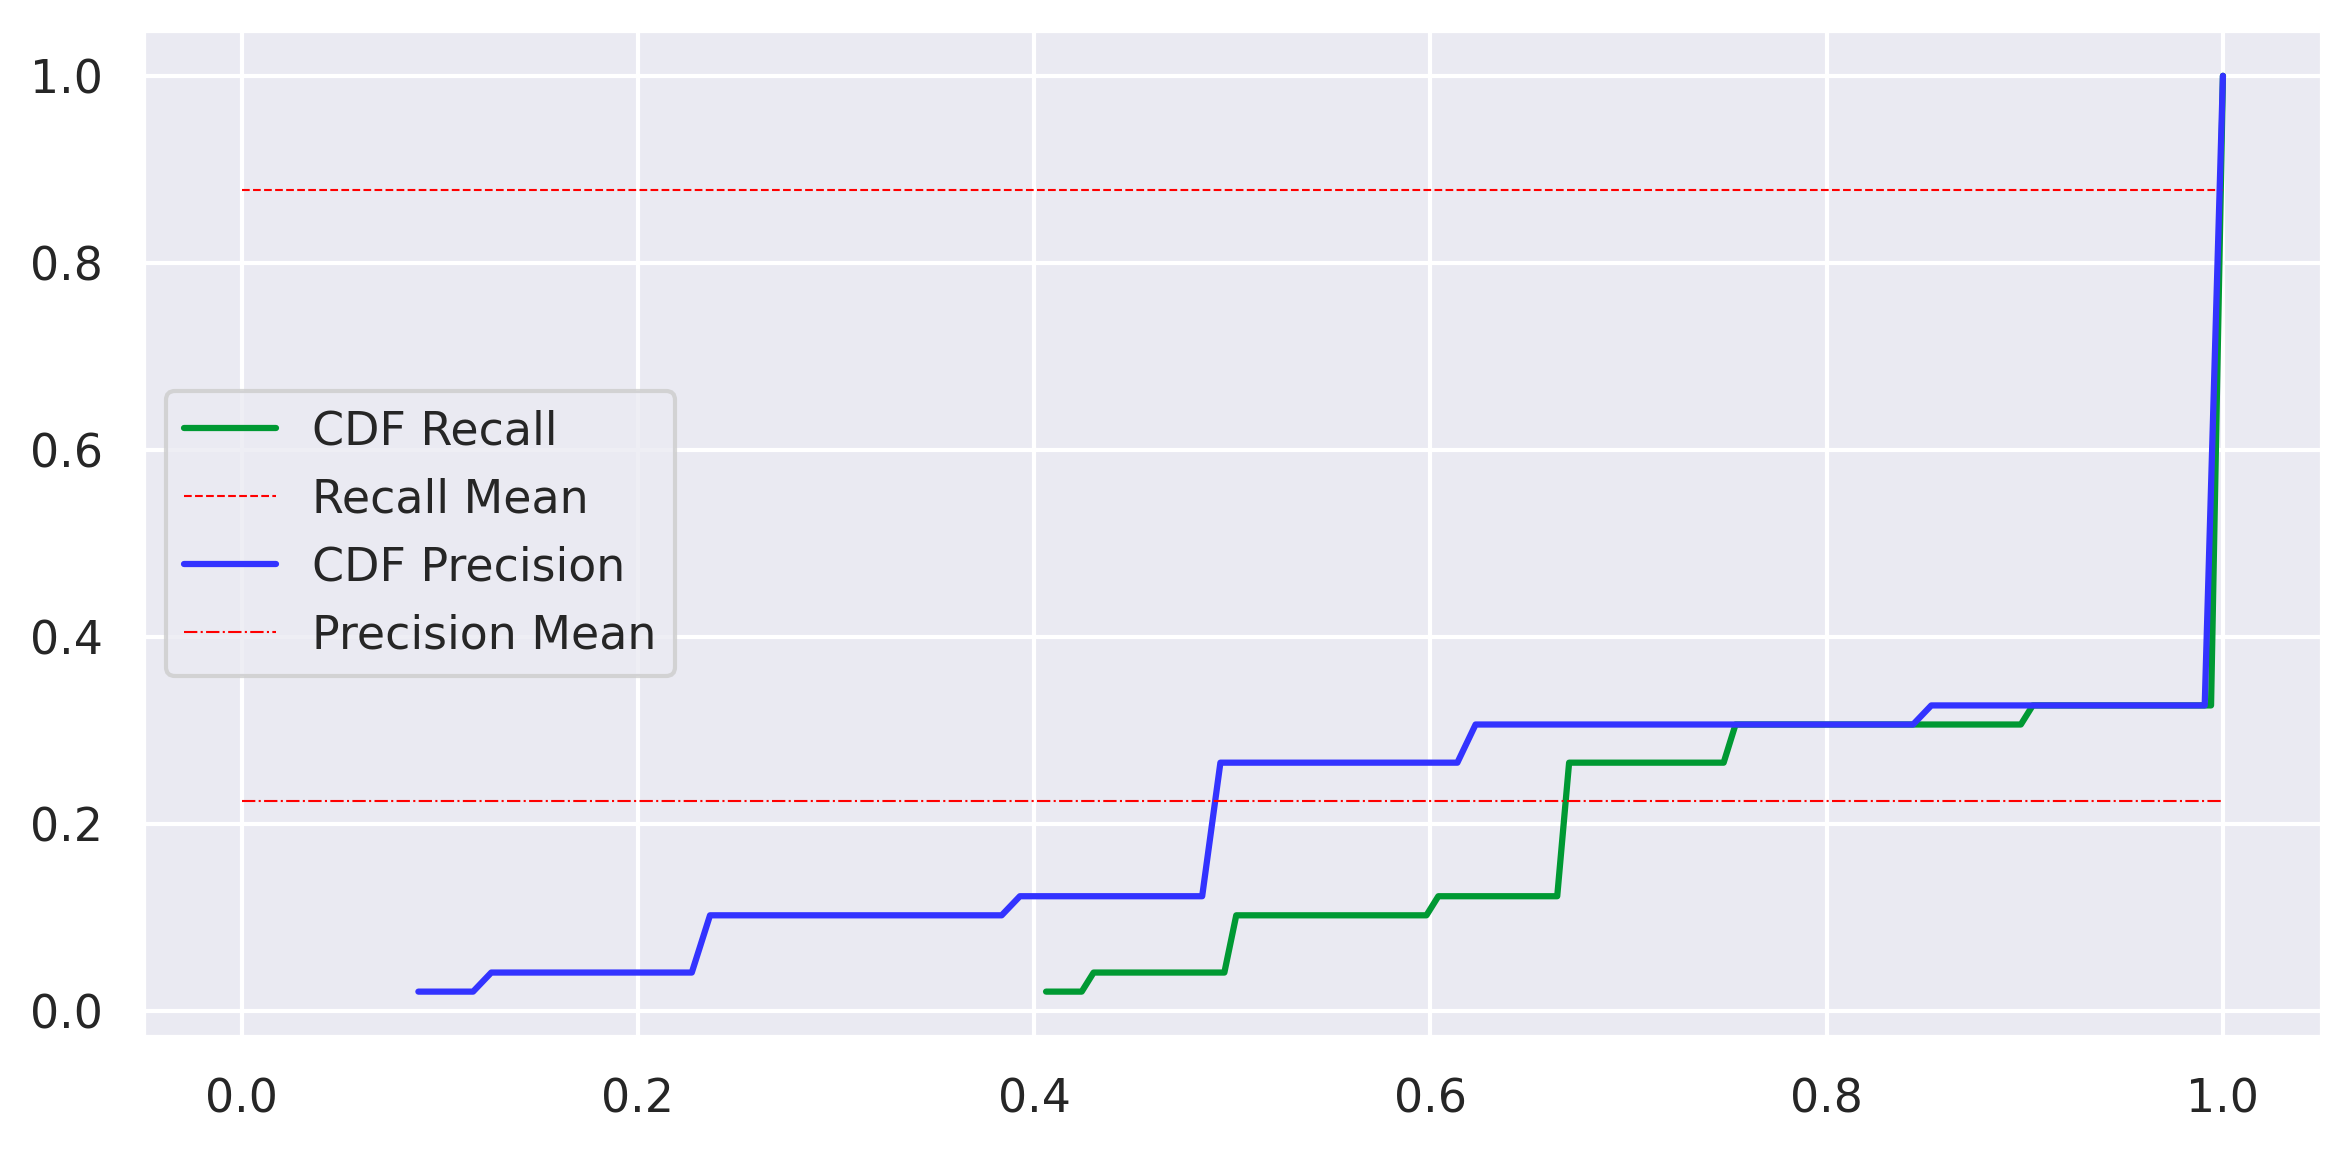

In [463]:
plot_cdf_recall_precision(Total_R, Total_P, Mean_R/len(recomendation), Mean_P/len(recomendation))

In [398]:
a = [2]*5
a

[2, 2, 2, 2, 2]